In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -q keras

In [3]:
!rm -r *
!git clone https://github.com/prabhunithingollapudi007/HandSignClassification.git

Cloning into 'HandSignClassification'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (356/356), done.
remote: Compressing objects: 100% (351/351), done.
remote: Total 356 (delta 2), reused 353 (delta 2), pack-reused 0
Receiving objects: 100% (356/356), 15.20 MiB | 2.51 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls

HandSignClassification


In [0]:
from glob import glob
from sklearn.model_selection import train_test_split

In [0]:
from glob import glob

from sklearn.model_selection import train_test_split

zeros = glob('HandSignClassification/Images/rgb/train/rgb_0/*.jpg')
ones = glob('HandSignClassification/Images/rgb/train/rgb_1/*.jpg')
twos = glob('HandSignClassification/Images/rgb/train/rgb_2/*.jpg')
threes = glob('HandSignClassification/Images/rgb/train/rgb_3/*.jpg')
fours = glob('HandSignClassification/Images/rgb/train/rgb_4/*.jpg')
fives = glob('HandSignClassification/Images/rgb/train/rgb_5/*.jpg')
sixes = glob('HandSignClassification/Images/rgb/train/rgb_6/*.jpg')
sevens = glob('HandSignClassification/Images/rgb/train/rgb_7/*.jpg')
eights = glob('HandSignClassification/Images/rgb/train/rgb_8/*.jpg')
nines = glob('HandSignClassification/Images/rgb/train/rgb_9/*.jpg')

In [0]:
zeros_train, zeros_test = train_test_split(zeros, test_size=0.2)

ones_train, ones_test = train_test_split(ones, test_size=0.2)
twos_train, twos_test = train_test_split(twos, test_size=0.2)
threes_train, threes_test = train_test_split(threes, test_size=0.2)

fours_train, fours_test = train_test_split(fours, test_size=0.2)
fives_train, fives_test = train_test_split(fives, test_size=0.2)
sixes_train, sixes_test = train_test_split(sixes, test_size=0.2)

sevens_train, sevens_test = train_test_split(sevens, test_size=0.2)
eights_train, eights_test = train_test_split(eights, test_size=0.2)
nines_train, nines_test = train_test_split(nines, test_size=0.2)

In [8]:
print(nines_train)

['HandSignClassification/Images/rgb/train/rgb_9/rgb_image_0.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_1.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_2.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_10.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_9.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_7.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_13.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_5.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_15.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_6.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_8.jpg', 'HandSignClassification/Images/rgb/train/rgb_9/rgb_image_12.jpg']


In [0]:
TRAIN_DIR = 'HandSignClassification/Images/rgb/train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/Zero
files = ' '.join(zeros_test)
!mv -t test/Zero $files

!mkdir test/One
files = ' '.join(ones_test)
!mv -t test/One $files

!mkdir test/Two
files = ' '.join(twos_test)
!mv -t test/Two $files

!mkdir test/Three
files = ' '.join(threes_test)
!mv -t test/Three $files

!mkdir test/Four
files = ' '.join(fours_test)
!mv -t test/Four $files

!mkdir test/Five
files = ' '.join(fives_test)
!mv -t test/Five $files

!mkdir test/Six
files = ' '.join(sixes_test)
!mv -t test/Six $files

!mkdir test/Seven
files = ' '.join(sevens_test)
!mv -t test/Seven $files

!mkdir test/Eight
files = ' '.join(eights_test)
!mv -t test/Eight $files

!mkdir test/Nine
files = ' '.join(nines_test)
!mv -t test/Nine $files

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


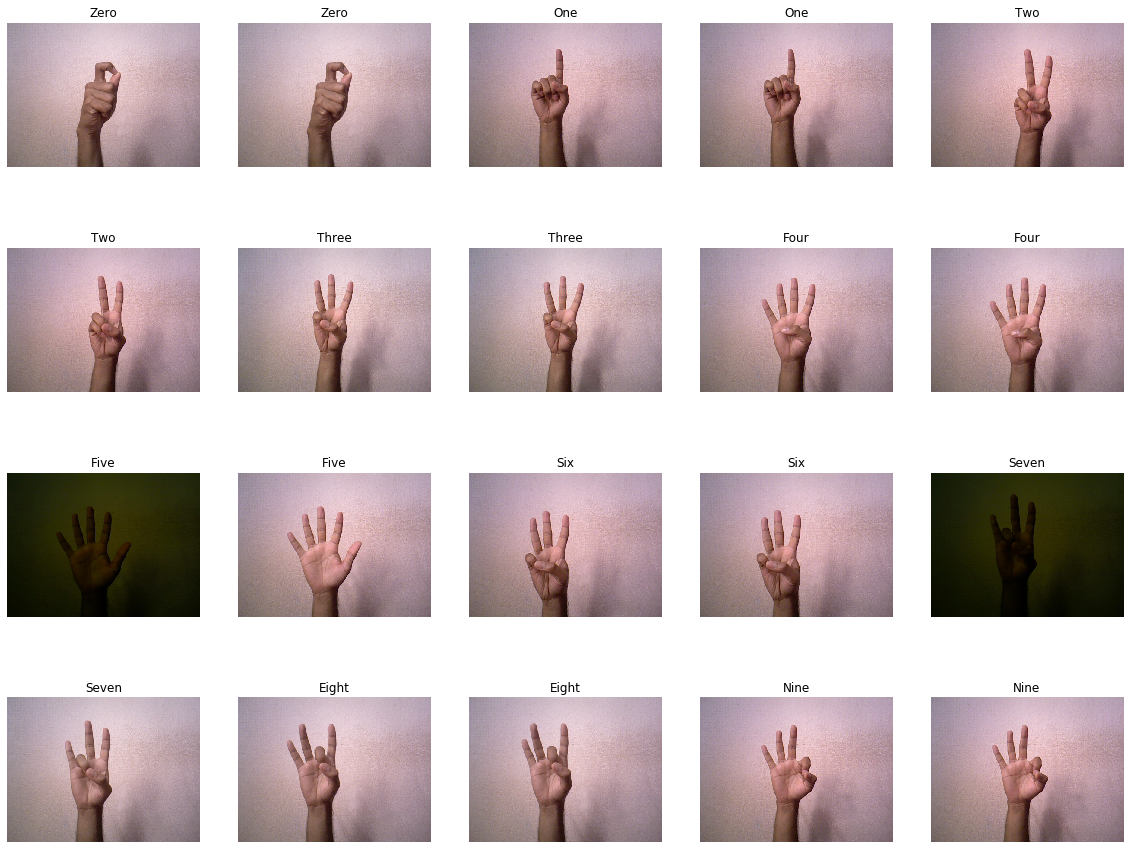

In [11]:
zeros = np.random.choice(zeros_train, 2)

ones = np.random.choice(ones_train, 2)
twos = np.random.choice(twos_train, 2)
threes = np.random.choice(threes_train, 2)

fours = np.random.choice(fours_train, 2)
fives = np.random.choice(fives_train, 2)
sixes = np.random.choice(sixes_train, 2)

sevens = np.random.choice(sevens_train, 2)
eights = np.random.choice(eights_train, 2)
nines = np.random.choice(nines_train, 2)

data = np.concatenate((zeros, ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
labels = 2* ['Zero'] + 2 * ['One'] + 2 *['Two'] + 2 *['Three'] + 2 *['Four'] + 2 *['Five'] + 2 *['Six'] + 2 *['Seven'] + 2 *['Eight'] + 2 *['Nine']

N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

In [12]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 10
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.






87916544/87910968 [==============================] - 8s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [13]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 640
HEIGHT = 480
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 120 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


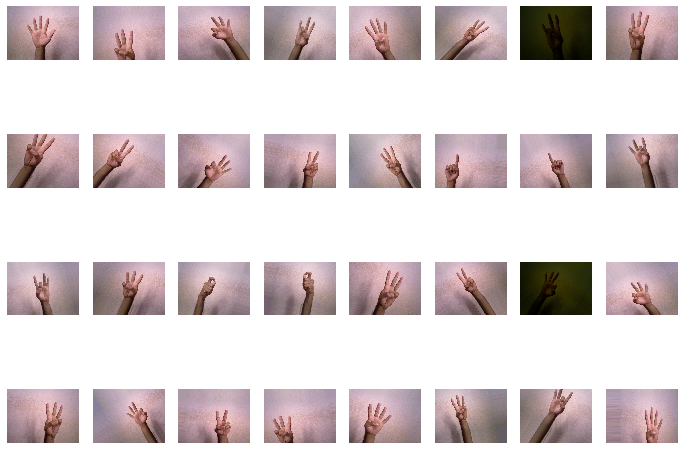

In [14]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [15]:
EPOCHS = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'classifier.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
320/320 [==============================] - 722s 2s/step - loss: 1.9204 - acc: 0.3455 - val_loss: 2.6827 - val_acc: 0.0633
Epoch 2/10
320/320 [==============================] - 697s 2s/step - loss: 1.3520 - acc: 0.5977 - val_loss: 3.3091 - val_acc: 0.0500
Epoch 3/10
320/320 [==============================] - 700s 2s/step - loss: 1.0823 - acc: 0.6863 - val_loss: 3.7615 - val_acc: 0.0586
Epoch 4/10
320/320 [==============================] - 702s 2s/step - loss: 0.9401 - acc: 0.7309 - val_loss: 4.0106 - val_acc: 0.0430
Epoch 5/10
320/320 [==============================] - 719s 2s/step - loss: 0.8335 - acc: 0.7506 - val_loss: 4.5747 - val_acc: 0.0594
Epoch 6/10
320/320 [==============================] - 732s 2s/step - loss: 0.7886 - acc: 0.7618 - val_loss: 4.6460 - val_acc: 0.0625
Epoch 7/10
320/320 [==============================] - 716s 2s/step - loss: 0.7374 - acc: 0.7756 - val_loss

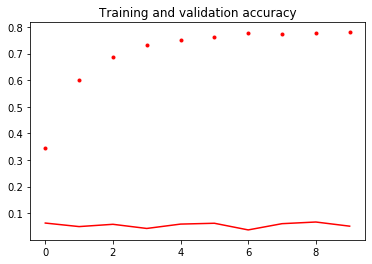

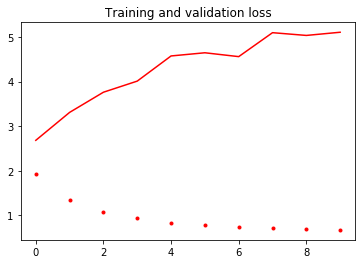

In [16]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("one", "two")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [18]:
model = load_model(MODEL_FILE)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
  from sklearn.metrics import confusion_matrix

In [0]:
outputs_test = model.predict_generator(validation_generator)

In [21]:
print(outputs_test)

[[3.09657684e-04 5.77293977e-05 1.84980452e-01 1.93143338e-01
  3.68875079e-02 1.18790559e-01 4.74412367e-03 1.75550599e-02
  1.32923818e-03 4.42202270e-01]
 [5.01159113e-04 1.29538283e-04 1.09975830e-01 1.14038542e-01
  6.22476749e-02 3.25745434e-01 4.70746262e-03 4.17323261e-02
  5.58550749e-03 3.35336506e-01]
 [1.24081096e-04 7.35234380e-06 1.99583825e-02 3.27726334e-01
  1.23118274e-01 3.59752685e-01 6.80139940e-03 6.66191801e-02
  2.50827824e-03 9.33840051e-02]
 [5.39941720e-05 1.09669147e-03 2.93226629e-01 2.87870079e-01
  1.52659575e-02 3.63365561e-02 6.00748556e-03 3.12550813e-02
  9.09298426e-04 3.27978194e-01]
 [1.79701965e-05 1.22046964e-04 1.13096483e-01 5.60650706e-01
  5.13088005e-03 3.20182815e-02 1.10759065e-02 2.45758798e-02
  1.87558006e-03 2.51436293e-01]
 [2.41540576e-04 4.31652617e-04 2.19873548e-01 3.65308106e-01
  4.52509187e-02 1.46302909e-01 3.96405440e-03 2.96102967e-02
  1.39050849e-03 1.87626392e-01]
 [2.53120065e-03 1.66385886e-04 1.41541949e-02 8.07742923e

In [0]:
import numpy

In [23]:
predictions = []
for array in outputs_test:
  temp = [x for x in array]
  max_value = max(temp)
  print("max value:%f, %d" %(max_value,temp.index(max_value) + 1))
  predictions.append(temp.index(max_value) + 1)

max value:0.442202, 10
max value:0.335337, 10
max value:0.359753, 6
max value:0.327978, 10
max value:0.560651, 4
max value:0.365308, 4
max value:0.483204, 6
max value:0.590940, 10
max value:0.644324, 10
max value:0.803502, 4
max value:0.364549, 1
max value:0.541879, 10
max value:0.895653, 3
max value:0.434295, 10
max value:0.396716, 10
max value:0.433698, 10
max value:0.481936, 6
max value:0.435202, 6
max value:0.892793, 1
max value:0.847132, 4
max value:0.433525, 4
max value:0.426937, 6
max value:0.296406, 6
max value:0.632941, 4
max value:0.650308, 6
max value:0.423144, 6
max value:0.463364, 4
max value:0.498741, 6
max value:0.473114, 4
max value:0.538812, 6
max value:0.630798, 4
max value:0.373363, 4
max value:0.334852, 1
max value:0.347712, 4
max value:0.333176, 6
max value:0.473518, 4
max value:0.250163, 6
max value:0.505736, 4
max value:0.621310, 10
max value:0.681423, 10


In [0]:
true_values = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9]

In [25]:
confusion_matrix(true_values, predictions)

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3],
       [0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3],
       [0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(true_values, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       1.00      0.25      0.40         4
           4       0.08      0.25      0.12         4
           5       0.00      0.00      0.00         4
           6       0.25      0.75      0.38         4
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         0

    accuracy                           0.12        40
   macro avg       0.12      0.11      0.08        40
weighted avg       0.13      0.12      0.09        40



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
input_predictions = model.predict_generator(train_generator)

In [0]:
predictions = []
for array in input_predictions:
  temp = [x for x in array]
  max_value = max(temp)
  #print("max value:%f, %d" %(max_value,temp.index(max_value) + 1))
  predictions.append(temp.index(max_value) + 1)

In [0]:
true_values = []
for i in range(0, 10):
  for j in range(12):
    true_values.append(i)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_values, predictions)

array([[0, 0, 0, 0, 6, 0, 4, 0, 0, 0, 2],
       [0, 2, 0, 1, 2, 0, 5, 0, 0, 0, 2],
       [0, 0, 0, 1, 4, 0, 5, 0, 0, 0, 2],
       [0, 3, 0, 0, 3, 0, 2, 0, 0, 0, 4],
       [0, 1, 0, 0, 6, 0, 3, 0, 0, 0, 2],
       [0, 1, 0, 0, 3, 1, 2, 0, 0, 0, 5],
       [0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 7],
       [0, 0, 0, 2, 4, 0, 3, 0, 0, 0, 3],
       [0, 0, 0, 0, 8, 0, 2, 0, 0, 0, 2],
       [0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(true_values, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.29      0.17      0.21        12
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        12
           4       0.14      0.50      0.22        12
           5       1.00      0.08      0.15        12
           6       0.09      0.25      0.13        12
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         0

    accuracy                           0.10       120
   macro avg       0.14      0.09      0.07       120
weighted avg       0.15      0.10      0.07       120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


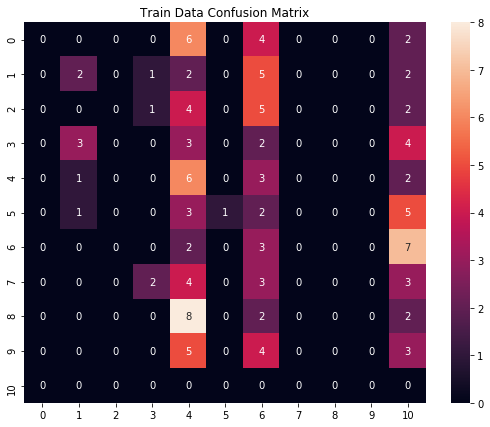

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_values, predictions)
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
plt.title("Train Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

In [0]:
predictions = []
for array in input_predictions:
  temp = [x for x in array]
  max_value = max(temp)
  #print("max value:%f, %d" %(max_value,temp.index(max_value) + 1))
  predictions.append(temp.index(max_value) + 1)

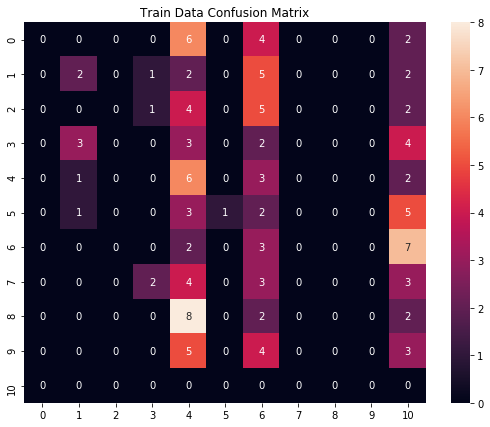

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_values, predictions)
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
plt.title("Train Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})